### Solving Express without replacement

Solved with replacement here: https://github.com/dwanneruchi/538_Riddlers/blob/master/2022/20220826/riddler_express_with_replacement.ipynb

Without replacement shifts the type of distribution we can use from a binomial to a hypergeometric distribution. Below is the wikipedia entry:
> In probability theory and statistics, the hypergeometric distribution is a discrete probability distribution that describes the probability of k successes (random draws for which the object drawn has a specified feature) in n draws, without replacement, from a finite population of size N that contains exactly K objects with that feature, wherein each draw is either a success or a failure.

In [1]:
from scipy.stats import hypergeom
import numpy as np

# M: total cards, 10 in our case
# n: total winning cards, 9 in our case
# N: games we play, max at M
M, n, N = (10, 9, 1)
rv = hypergeom(M, n, N)
pmf_wins = rv.pmf(N) # all we care about is that games played equals our wins
pmf_wins # unsurprisingly, same probability as when we used binomial since a single draw of hypergeom == binomial

0.8999999999999996

Trials that maximize winnings: 5


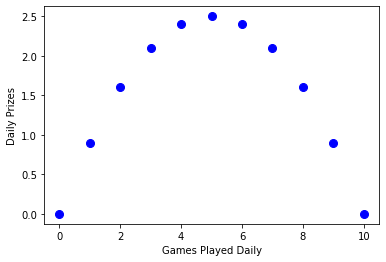

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# We can now solve across multiple N games
M, n = (10, 9)
N = np.arange(0,10 + 1) # we can play at most 10 times
k = N
ev = hypergeom.pmf(k, M, n, N) * k # solve for expected value

ax.plot(k, ev, 'bo', ms=8, label='Expected Value');
plt.xlabel('Games Played Daily')
plt.ylabel('Daily Prizes')

print(f"Trials that maximize winnings: {N[np.argmax(ev)]}")

In [ ]:
# Extra Credit
# larger scale of N trials
N_list = [10_000, 250_000, 1_000_000, 
          2_000_000, 10_000_000, 100_000_000, 
          1_000_000_000] # up to 1 billion!

for N in N_list:
    
    # set-up distribution
    M, n = (N, N-1)
    Ns = np.arange(0.4 * N, 0.6 * N) # we can play at most N times, but I know solutions are near N/2 so limiting range
    k = Ns
    ev = hypergeom.pmf(k, M, n, Ns) * k # solve for expected value

    # solving expected value
    print(f"Testing N of size {N}")
    print(f"Trials that maximize winnings: {Ns[np.argmax(ev)]}")
    print(f"Highest Avg Winnings: {ev[np.argmax(ev)]}")
    print(f"Ratio relative to N: {N / ev[np.argmax(ev)]}\n")

Testing N of size 10000
Trials that maximize winnings: 5000.0
Highest Avg Winnings: 2499.999999985496
Ratio relative to N: 4.000000000023206

Testing N of size 250000
Trials that maximize winnings: 124998.0
Highest Avg Winnings: 62500.00001073418
Ratio relative to N: 3.9999999993130126

Testing N of size 1000000
Trials that maximize winnings: 499998.0
Highest Avg Winnings: 250000.0001571617
Ratio relative to N: 3.999999997485413

Testing N of size 2000000
Trials that maximize winnings: 999992.0
Highest Avg Winnings: 500000.00315081474
Ratio relative to N: 3.9999999747934822

Testing N of size 10000000
Trials that maximize winnings: 5000115.0
Highest Avg Winnings: 2500000.038948763
Ratio relative to N: 3.99999993768198



#### Extra Credit Solution: 

My approach reinforces a strategy of playing `N/2` games with expected earning of `N/4` prizes. 